# Auteur : Ahmed Bachir Diedhiou

#Mission
Réalisation d'une étude de grande ampleur sur le thème de la sous-nutrition dans le monde avec les données de la FAO(Food and Agriculture Organization of the United Nations).


## Importation des données

###Mise en place des librairies et importation

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=2,linewidth=500,suppress=True)

**1.Identifiez les grandes tendances.
Importation et telechargement des données**





>Création d'une fonction pour décompresser les données.

In [ ]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

def download_unzip(zipurl, destination):
    """Download zipfile from URL and extract it to destination"""
    with urlopen(zipurl) as zipresp:
        with ZipFile(BytesIO(zipresp.read())) as zfile:
            zfile.extractall(destination)

>On télécharge les données. On les mets dans un dossier appelés "données"

In [ ]:
download_unzip("https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/DAN_V1_P3/data.zip", "données")

>On liste le contenu de l'archive "données"

In [ ]:
!ls -R données

données:
data

données/data:
fr_animaux.csv	 fr_population.csv	  fr_vegetaux.csv
fr_céréales.csv  fr_sousalimentation.csv


>Chargement de chaque csv comme un dataframe

In [ ]:
animaux =pd.read_csv("données/data/fr_animaux.csv",encoding='utf-8',  delimiter=",", decimal=',')
cereales =pd.read_csv("données/data/fr_céréales.csv",encoding='utf-8',  delimiter=",",decimal=',')
population =pd.read_csv("données/data/fr_population.csv",encoding='utf-8',  delimiter=",",decimal=',')
sousalimentation =pd.read_csv("données/data/fr_sousalimentation.csv",encoding='utf-8',delimiter=",",decimal=',')
vegetaux =pd.read_csv("données/data/fr_vegetaux.csv",encoding='utf-8', delimiter=",", decimal=',')

In [ ]:
#On donne de nouveaux noms à nos dataframe 
df_animaux=pd.DataFrame(animaux)
df_vegetaux=pd.DataFrame(vegetaux)
df_population=pd.DataFrame(population)
df_cereales=pd.DataFrame(cereales)
df_sousalimentation=pd.DataFrame(sousalimentation)

In [ ]:
df_vegetaux.dtypes

Zone                                                             object
Code zone                                                         int64
Produit                                                          object
Aliments pour animaux (kg/an)                                    object
Autres utilisations (non alimentaire) (kg/an)                    object
Disponibilité alimentaire (Kcal/personne/jour)                   object
Disponibilité alimentaire en quantité (kg/personne/an)           object
Disponibilité de matière grasse en quantité (g/personne/jour)    object
Disponibilité de protéines en quantité (g/personne/jour)         object
Disponibilité intérieure (kg/an)                                 object
Exportations - Quantité (kg/an)                                  object
Importations - Quantité (kg/an)                                  object
Nourriture (kg/an)                                               object
Pertes (kg/an)                                                  

On remarque que ls nombre qui se trouvent dans les colonnes sont de **type "object"**. Ils sont considérés comme des "objets" et pas comme des "nombres" au sens mathématique du terme. Ce qui rend impossible tout "vrai" calcul. Pour pouvoir faire des calculs avec ces nombres on doit effectuer une conversion de leur **type ("objet")** en **type "numeric"**.




In [ ]:
for colonne in df_vegetaux:
  if colonne != 'Produit' and colonne !='Zone':
    df_vegetaux[colonne]=pd.to_numeric(df_vegetaux[colonne])
    df_animaux[colonne]=pd.to_numeric(df_animaux[colonne])

In [ ]:
df_vegetaux.dtypes

Zone                                                              object
Code zone                                                          int64
Produit                                                           object
Aliments pour animaux (kg/an)                                    float64
Autres utilisations (non alimentaire) (kg/an)                    float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure (kg/an)                                 float64
Exportations - Quantité (kg/an)                                  float64
Importations - Quantité (kg/an)                                  float64
Nourriture (kg/an)                                               float64
Pertes (kg/an)                                     



# Réponses aux questions





###Question 1 : donnez le résultat de votre calcul pour l'année 2013.




In [ ]:
# Calcul de la population totale
print('Population Totale = ',sum(population["Valeur"])/1000000,' Milliards')

Population Totale =  8.413993  Milliards


> La population totale trouvée est supérieure à la population totale réelle de 2013. Ceci peut être due à une redondance au niveau des données (un pays est représentée deux fois dans la série de données) ou à une erreur de saisie.
Dans un premier temps nous allons verifier si des redondances sont présentes notre série de données. Dans un deuxième temps nous allons vérifier la présence de données abbérantes en traçant le diagramme en barre de de la de la population de chaque pays.

> Verifions d'abord si il y a des doublons dans notre série de données.

In [ ]:
print("Est-ce le tableau sans doublon a le nombre de ligne que le tableau sans doublon? :", len(population['Valeur'])==len(population['Valeur'].unique()) )  # Renvoie True ou False

population.duplicated()

Est-ce le tableau sans doublon a le nombre de ligne que le tableau sans doublon? : True


0      False
1      False
2      False
3      False
4      False
       ...  
170    False
171    False
172    False
173    False
174    False
Length: 175, dtype: bool

> On voit bien d'après le résultat précédent qu'il n'y a pas de doublons dans nos données. Maintenant, à l'aide d'un diagramme en baton, nous allons voir si des données abbérantes sont présentes ou non dans notre tableau.


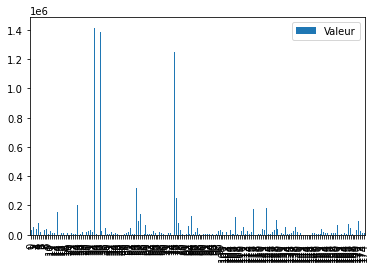

In [ ]:
population['Valeur'] = pd.to_numeric(population['Valeur'])

population[['Zone', 'Valeur']].plot.bar()

>Le diagramme nous montre qu'il y a 3 pays dont la population est dépasse 1.2 milliards d'habitants. Ceci ne correspond pas à la réalité des faits car dans ce monde il n'existe que deux pays dont la population dépasse le milliard qui sont la Chine et l'Inde. 
Afin d'identifier le troisème pays qui apparait dans ce diagramme, allons extraire ces trois pays sz notre table population.

In [ ]:
# Tableau qui contient les 3 pays (dont la population est supérieure à 1 milliards)
population[(population['Valeur'])>1000000]

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
33,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,351,Chine,511,Population totale,2501,Population,2013,2013,1000 personnes,1416667,A,"Agrégat, peut inclure des données officielles,..."
36,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,41,"Chine, continentale",511,Population totale,2501,Population,2013,2013,1000 personnes,1385567,NaN,Donnée officielle
75,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,100,Inde,511,Population totale,2501,Population,2013,2013,1000 personnes,1252140,NaN,Donnée officielle


>On voit ici que la population chinoise est représentée deux fois avec différentes désignations (Chine et Chine continentale). Mais d'après quelques recherches concernant l'évolution de la démographie chinoise (cf banque mondiale), on peut voir que la population "Chine continentale" de notre tableau ne correspond à la totatlité de la population chinoise. Elle répresente que la population population chinoise hors région administratives spéciales.C'est la population "Chine" du tableau qui en réalité correspond à la totalité de la population chinoise.On peut résumer la situation par cette formule: *population "Chine" = population "Chine continentale"+ population "des régions administratives spéciales"*.
Donc il y a une certaine redondance qui fait deux fois apparaître la population de la "Chine, continentale"  dans les données : une première fois dans la population de "Chine continentale" et une deuxième fois dans la population de "Chine continentale".
Recalculons une deuxième fois la population totale en excluant la population de la "Chine" de notre  tableau.

In [ ]:
print( "la population totale =", population[population['Zone'] !="Chine, continentale"].Valeur.sum()/1000000 , " Milliard")

population_totale=population[population['Zone'] !="Chine, continentale"].Valeur.sum()*1000


la population totale = 7.028426  Milliard


>Le résultat que l'on obtient est plus du résultat réel (population mondiale en 2013). Donc dans la suite de l'étude les lignes contenant "Chine continentale" seront supprimées de toutes les tables.

In [ ]:
df_vegetaux.drop(df_vegetaux[df_vegetaux['Zone']=='Chine, continentale'].index, inplace=True)
df_animaux.drop(df_animaux[df_animaux['Zone']=='Chine, continentale'].index, inplace=True)
df_cereales.drop(df_cereales[df_cereales['Zone']=='Chine, continentale'].index, inplace=True)
df_population.drop(df_population[df_population['Zone']=='Chine, continentale'].index, inplace=True)
df_sousalimentation.drop(df_sousalimentation[df_sousalimentation['Zone']=='Chine, continentale'].index, inplace=True)

Parmi les documents sur les Bilans alimentaires que nous avons téléchargés, il y a des informations redondantes. En effet, pour un pays donné, certaines de ces informations peuvent se calculer à partir d'autres.

Identifions ces redondances, en donnant notre réponse sous forme de formule mathématique. C'est une équation à 3 termes de type  $(a_1 + a_2 +[...] = b_1 + b_2 + [...] = c_1 + c_2 + [...])$ faisant intervenir chacune des 11 quantités données ci dessus. 



In [ ]:
fr=df_vegetaux[(df_vegetaux['Zone']=='France') & (df_vegetaux['Produit']=='Blé')].copy()
fr

,Zone,Code zone,Produit,Aliments pour animaux (kg/an),Autres utilisations (non alimentaire) (kg/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (kg/an),Exportations - Quantité (kg/an),Importations - Quantité (kg/an),Nourriture (kg/an),Pertes (kg/an),Production (kg/an),Semences (kg/an),Traitement (kg/an),Variation de stock (kg/an)
3782,France,68,Blé,7.822000e+09,2.824000e+09,811.0,108.43,4.2,25.99,2.029800e+10,2.150200e+10,2.055000e+09,6.971000e+09,358000000.0,3.861400e+10,748000000.0,1.575000e+09,1.131000e+09


In [ ]:
fr['Disponibilité intérieure (kg/an)']-(fr['Pertes (kg/an)']+fr['Aliments pour animaux (kg/an)']+fr['Exportations - Quantité (kg/an)']+fr['Semences (kg/an)']+fr['Autres utilisations (non alimentaire) (kg/an)']+fr['Nourriture (kg/an)'])


3782   -1.992700e+10
dtype: float64

Disponibilité intérieure + exportation - importations +Variation de stocks =Production

Aliments pour animaux +Exportations+ Pertes+ semence+ Traitement= Production




In [ ]:
df_vegetaux['Type produit']=[ 'vegetal' for i in range(len(df_vegetaux['Produit']))]

df_animaux['Type produit']=[ 'animal' for i in range(len(df_animaux['Produit']))]

Calculons (pour chaque pays et chaque produit) la disponibilité alimentaire en kcal puis en kg de protéines.

> On crée une table contenant les produits animaux et vegetaux, leur origine, leur quantité etc . 

In [ ]:
produits_animaux_et_vegetaux=pd.concat([df_vegetaux, df_animaux], keys=["vegetaux", "animaux"])

In [ ]:
produits_animaux_et_vegetaux_copy=produits_animaux_et_vegetaux.copy()

On va ajouter à notre table des produits animaux et vegetaux la population de chaque pays. Nos allons alors faire une jointure de notre table produits_animaux_et_vegetaux et de la des colonnes 'Zone' et 'Valeur' de notre table df_population. 

Avant de faire la jointure il faudra vérifier que tous les pays présente dans la table population sont aussi présente dans la table produits_animaux_et_vegetaux

In [ ]:
#vérififcation : renvoie True si les deux ensembles sont identiques
set(df_population['Zone']) == set(produits_animaux_et_vegetaux['Zone'])

True

**1.   Disponibilité alimentaire pour les vegetaux et animaux**


---




>Nous allons allons créer une nouvelle table en concatenant notre table aliments_vegetaux à la table pays_et_nb_habitants(contenant chaque pays et sa population)

In [ ]:
#Concaténation des deux tables
#tmp=pays_et_nb_habitants.merge(les_vegetaux,left_on='Zone',right_on='Zone')
# ATTENTION LE NOM DE LA NOUVELLE TABLE EST VEGETAUX_ANIMAUX
produits_vegetaux_et_animaux_complet=pd.merge(df_population[['Zone','Valeur']], produits_animaux_et_vegetaux, how='inner', on =['Zone'])

produits_vegetaux_et_animaux_complet.rename(columns={'Valeur': 'Population'}, inplace=True)

>On calcule maintenant les disponiblités demandées

In [ ]:
produits_vegetaux_et_animaux_complet['Disponibilité alimentaire annuel en KCAL'] = produits_vegetaux_et_animaux_complet['Disponibilité alimentaire (Kcal/personne/jour)']*produits_vegetaux_et_animaux_complet['Population']*1000*365
produits_vegetaux_et_animaux_complet['Disponibilité de protéines annuel en KG'] = (produits_vegetaux_et_animaux_complet['Disponibilité de protéines en quantité (g/personne/jour)']*0.001)*(produits_vegetaux_et_animaux_complet['Population']*1000)*365


In [ ]:
produits_vegetaux_et_animaux_complet[(produits_vegetaux_et_animaux_complet['Zone']=='Afghanistan') & (produits_vegetaux_et_animaux_complet['Produit']=='Abats Comestible')]

,Zone,Population,Code zone,Produit,Aliments pour animaux (kg/an),Autres utilisations (non alimentaire) (kg/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),...,Importations - Quantité (kg/an),Nourriture (kg/an),Pertes (kg/an),Production (kg/an),Semences (kg/an),Traitement (kg/an),Variation de stock (kg/an),Type produit,Disponibilité alimentaire annuel en KCAL,Disponibilité de protéines annuel en KG
49,Afghanistan,30552,2,Abats Comestible,NaN,NaN,5.0,1.72,0.2,0.77,...,NaN,53000000.0,NaN,53000000.0,NaN,NaN,NaN,animal,5.575740e+10,8586639.6


A partir de ces dernières informations, et à partir du poids de la disponibilité alimentaire (pour chaque pays et chaque produit), calculons pour chaque produit le ratio "énergie/poids", que nous donnerons en kcal/kg. On vérifira la cohérence de notre calcul en comparant ce ratio aux données disponibles sur internet, par exemple en cherchant la valeur calorique d'un oeuf.


In [ ]:
#J'exclus les lignes où la Nourriture est égale =0 pour éviter des divisions par 0
produits_vegetaux_et_animaux_complet['Ration KCAL/KG'] = produits_vegetaux_et_animaux_complet['Disponibilité alimentaire annuel en KCAL']/(produits_vegetaux_et_animaux_complet['Nourriture (kg/an)']).copy()

tmp=produits_vegetaux_et_animaux_complet[produits_vegetaux_et_animaux_complet['Nourriture (kg/an)']>0.0]
# On supprime les valeurs infinies

In [ ]:
set(produits_vegetaux_et_animaux_complet[produits_vegetaux_et_animaux_complet['Produit']=='Huiles de Foie de Poisso']['Ration KCAL/KG'])

{nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 nan,
 nan,
 nan,
 10846.705,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 9119.16,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan}

In [ ]:
print('valeur calorique Oeuf :',tmp[tmp['Produit']=='Oeufs']['Ration KCAL/KG'].mean()/10, 'pour 100 g')

valeur calorique Oeuf : 134.5239388834113 pour 100 g


>En suivant la même méthodologie, calculez également le pourcentage de protéines de chaque
produit (pour chaque pays). Ce pourcentage est obtenu en calculant le ratio "poids de
protéines/poids total" (attention aux unités utilisées). Vous pouvez vérifier la cohérence de votre
calcul en comparant ce ratio aux données disponibles sur internet, par exemple en cherchant la
teneur en protéines de l'avoine.

In [ ]:
#Calcul du pourcentage de protéines de chaque produit 
produits_vegetaux_et_animaux_complet['Pourcentage proteine']= (produits_vegetaux_et_animaux_complet['Disponibilité de protéines annuel en KG']/produits_vegetaux_et_animaux_complet['Nourriture (kg/an)'])*100
produits_vegetaux_et_animaux_complet['Pourcentage proteine']= (produits_vegetaux_et_animaux_complet['Disponibilité de protéines annuel en KG']/produits_vegetaux_et_animaux_complet['Nourriture (kg/an)'])*100


In [ ]:
tmp=produits_vegetaux_et_animaux_complet[produits_vegetaux_et_animaux_complet['Nourriture (kg/an)']>0.0]

In [ ]:
print('Pourcentage de protéine Oeuf :',round(tmp[tmp['Produit']=='Oeufs']['Pourcentage proteine'].mean(),2) , ' %')

Pourcentage de protéine Oeuf : 10.56  %


In [ ]:
produits_vegetaux_et_animaux_complet

,Zone,Population,Code zone,Produit,Aliments pour animaux (kg/an),Autres utilisations (non alimentaire) (kg/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),...,Pertes (kg/an),Production (kg/an),Semences (kg/an),Traitement (kg/an),Variation de stock (kg/an),Type produit,Disponibilité alimentaire annuel en KCAL,Disponibilité de protéines annuel en KG,Ration KCAL/KG,Pourcentage proteine
0,Afghanistan,30552,2,"Agrumes, Autres",NaN,NaN,1.0,1.29,0.01,0.02,...,2000000.0,3000000.0,NaN,NaN,NaN,vegetal,1.115148e+10,223029.6,285.935385,0.571871
1,Afghanistan,30552,2,Aliments pour enfants,NaN,NaN,1.0,0.06,0.01,0.03,...,NaN,NaN,NaN,NaN,NaN,vegetal,1.115148e+10,334544.4,5575.740000,16.727220
2,Afghanistan,30552,2,Ananas,NaN,NaN,0.0,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,vegetal,0.000000e+00,NaN,NaN,NaN
3,Afghanistan,30552,2,Bananes,NaN,NaN,4.0,2.70,0.02,0.05,...,NaN,NaN,NaN,NaN,NaN,vegetal,4.460592e+10,557574.0,543.974634,0.679968
4,Afghanistan,30552,2,Bière,NaN,NaN,0.0,0.09,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,vegetal,0.000000e+00,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15601,Zimbabwe,14150,181,Viande d'Ovins/Caprins,NaN,NaN,3.0,0.96,0.19,0.37,...,NaN,14000000.0,NaN,NaN,NaN,animal,1.549425e+10,1910957.5,1106.732143,13.649696
15602,Zimbabwe,14150,181,Viande de Bovins,NaN,NaN,34.0,7.37,2.38,2.97,...,NaN,104000000.0,NaN,0.0,0.0,animal,1.756015e+11,15339307.5,1688.475962,14.749334
15603,Zimbabwe,14150,181,Viande de Suides,NaN,NaN,24.0,2.65,2.25,0.83,...,NaN,32000000.0,NaN,0.0,0.0,animal,1.239540e+11,4286742.5,3350.108108,11.585791
15604,Zimbabwe,14150,181,Viande de Volailles,NaN,NaN,17.0,4.97,1.05,1.69,...,NaN,64000000.0,NaN,NaN,NaN,animal,8.780075e+10,8728427.5,1254.296429,12.469182


On remarque qu'il y a des ecarts entre les ratios que l'on obtient avec ceux qui se trouvent sur internet. L'ecart peut varie entre 1% et 6%.

Citons 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids.




> Création d'une Nouvelle contenant chaque produit et sa valeur calorique



In [ ]:
val_calorique_des_produits = produits_vegetaux_et_animaux_complet[['Produit', 'Nourriture (kg/an)','Ration KCAL/KG']]

#On supprime les lignes ou la Nourritoure =0, c'est à dire les lignes ou la ratio ne peut pas être calculé à cause de la division par 0 qui s'impose lorsque l'on veut calcuer le ratio

val_calorique_des_produits = val_calorique_des_produits[val_calorique_des_produits['Nourriture (kg/an)'] >0.0]

Calcul de la moyenne de la valeur calorique de chaque produit 

In [ ]:
Moyenne_val_calorique= val_calorique_des_produits.groupby(['Produit']).mean().rename(columns={'Ration KCAL/KG':'Moyenne Ratio KCAL/KG'})

In [ ]:
print('les cinq aliments les plus calorique :\n \n', Moyenne_val_calorique.nlargest(20,'Moyenne Ratio KCAL/KG'))

les cinq aliments les plus calorique :
 
                           Nourriture (kg/an)  Moyenne Ratio KCAL/KG
Produit                                                            
Huiles de Poissons              2.233333e+07            9003.715504
Huile de Palmistes              3.928571e+07            8792.100117
Huile de Palme                  1.457429e+08            8720.287920
Huile de Germe de Maïs          2.763750e+07            8671.003459
Huile de Son de Riz             6.500000e+07            8658.062895
Huil Plantes Oleif Autr         1.431707e+07            8627.346995
Huile Graines de Coton          6.156250e+07            8606.458261
Huile de Soja                   1.833778e+08            8571.607770
Huile de Colza&Moutarde         1.465224e+08            8497.095123
Huile de Tournesol              7.975000e+07            8438.600827
Huile d'Olive                   3.090000e+07            8408.072294
Huile d'Arachide                4.765432e+07            8385.094731
Huile 

Citons 5 aliments parmi les 20 aliments les plus riches en protéines

In [ ]:
val_proteine_des_produits = produits_vegetaux_et_animaux_complet[['Produit', 'Nourriture (kg/an)','Pourcentage proteine']]

#On supprime les lignes ou la Nourritoure =0, c'est à dire les lignes ou la ratio ne peut pas être calculé à cause de la division par 0 qui s'impose lorsque l'on veut calcuer le ratio

val_proteine_des_produits = val_proteine_des_produits[val_proteine_des_produits['Nourriture (kg/an)'] >0.0]

#Calcul des moyennes pour chaque produit
Moyenne_val_proteine_des_produits= val_proteine_des_produits.groupby(['Produit']).mean()

#Les 5 aliments les plus riches en proteine
Moyenne_val_proteine_des_produits.nlargest(5,'Pourcentage proteine')

,Nourriture (kg/an),Pourcentage proteine
Produit,,
Soja,1.333133e+08,28.524844
Arachides Decortiquees,8.873188e+07,25.146831
Pois,5.269369e+07,22.324119
Légumineuses Autres,2.046767e+08,21.809032
Haricots,1.386032e+08,21.542731


Calculons, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal.

Avant de faire le calcul on doit supprimer les lignes où le ratio = inf, en d'autres ce sont les lignes où la Nourriture est à 0. 

In [ ]:

#Je crée une table contenant la disponilité intérieures des pays qui ont Nourriture en kg/an supérieur à 0, ceci est fait afin d'exclure de la table les ratios égaux à inf (qui faussent nos calculs)
disponibilité_interieure_vegetaux=produits_vegetaux_et_animaux_complet[(produits_vegetaux_et_animaux_complet['Type produit']=='vegetal') & (produits_vegetaux_et_animaux_complet['Nourriture (kg/an)']>0.0) ]['Disponibilité intérieure (kg/an)']

#Je crée une table contenant le ration energie/poids des produits végétaux
Ratio_vegetaux=produits_vegetaux_et_animaux_complet[(produits_vegetaux_et_animaux_complet['Type produit']=='vegetal') & (produits_vegetaux_et_animaux_complet['Nourriture (kg/an)']>0.0)]['Ration KCAL/KG']

#Je calcule le total de la disponiblité intérieure mondiale
disponibilité_interieure_vegetaux_mondiale_calorie = (disponibilité_interieure_vegetaux*Ratio_vegetaux).sum()

print("disponibilité_interieure_vegetaux_mondiale =", disponibilité_interieure_vegetaux_mondiale_calorie, " KCAL" )

disponibilité_interieure_vegetaux_mondiale = 1.235293662363638e+16  KCAL


Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ?
Nous tenterons de répondre à cette question et nous Donnerons les résultats en termes de calories, puis de protéines.


In [ ]:
#---En calorie-----#

#Je calcule le nombre de personnes que l'on pourrait nourrir avec la disponibilité mondiale en calorie. Le se base sur le besoin journalier moyen en calorie d'un homme (2400 KCAL)
besoin_annuel_moyen_calorie_homme =2400*365
n1=disponibilité_interieure_vegetaux_mondiale_calorie/besoin_annuel_moyen_calorie_homme

#Je crée une table contenant le pourentage en proteine de tous les produits végétaux
pourcentage_proteine_vegetaux=produits_vegetaux_et_animaux_complet[(produits_vegetaux_et_animaux_complet['Type produit']=='vegetal')]['Pourcentage proteine']

#Je calcule la quantité de protéine de chaque aliment 
n2=disponibilité_interieure_vegetaux*(pourcentage_proteine_vegetaux/100)

#Je calcule la quantité totale de protéines disponible
n2=n2.sum()

#Je calcule le nombre de personnes que l'on pourrait nourrir avec ce quantité de protéines. Sachant que le besoin journalier en protéine d'un homme est de 60g
besoin_annuel_proteine_homme=0.06*365
n2=n2/besoin_annuel_proteine_homme

print("le nombre d'humains que l'on pourrait nourrir en calorie =", n1/1000000000, 'Milliards', '| ce qui equivaut à : ', round((n1/population_totale *100),2), "% de la population mondiale \n")

print("Le nombre d'humainns que l'on peut nourrir en proteines=",n2/1000000000, ' Milliards', '| ce qui equivaut à : ', round(n2/population_totale *100,2), "% de la population mondiale")

le nombre d'humains que l'on pourrait nourrir en calorie = 14.101525826068928 Milliards | ce qui equivaut à :  200.64 % de la population mondiale 

Le nombre d'humainns que l'on peut nourrir en proteines= 13.296882440619772  Milliards | ce qui equivaut à :  189.19 % de la population mondiale


Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux, la nourriture végétale destinée aux animaux et les pertes de produits végétaux étaient utilisés pour de la nourriture ? 
Nous tenterons de répondre à cette question en donnant les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

Avant de faire le calcul on doit supprimer les lignes où le ratio = inf, en d'autres ce sont les lignes où la Nourriture est à 0. 

In [ ]:
#---En calorie-----#
#On crée une table contenant que les produits vegetaux (en excluant les ratios incalculables )
p=produits_vegetaux_et_animaux_complet[produits_vegetaux_et_animaux_complet['Type produit']=='vegetal']
p=p[p['Nourriture (kg/an)']>0.0]

#On calcule "la disponiblité alimentaire" + "Nourriture pour les animaux" + "pertes"
somme=p['Disponibilité alimentaire en quantité (kg/personne/an)']*p['Population']*1000+p['Aliments pour animaux (kg/an)']+p['Pertes (kg/an)']

#On calcule le nombre de personnes que l'on pourrait nourrir en calorie en basant notre calcul sur le besoin moyen journalier en protéine d'un homme (2400 kcal)
somme= (somme*p['Ration KCAL/KG']).sum()/besoin_annuel_moyen_calorie_homme 

#On calcule la quantité totale de protéine si la nourriture pour animaux et les pertes sont conservés pour les hommes
q_proteine=(p['Disponibilité alimentaire en quantité (kg/personne/an)']*p['Population']*1000*(p['Pourcentage proteine']/100)).sum()
#On calcule le nombre de personnes que l'on pourrait protéine 
m= q_proteine/besoin_annuel_proteine_homme

print("Le nombre d'êtres humains qui pourraient être nourris en KCAL : ", somme/1000000000,"Milliards", " | Ce qui équivaut à ", round(( somme/population_totale)*100,2), '% de la population mondiale')
print("Le nombre d'êtres humains qui pourraient être nourris en Protéines : ", m/1000000000,"Milliards", " | Ce qui équivaut à ", round((m/population_totale)*100,2), '% de la population mondiale')

Le nombre d'êtres humains qui pourraient être nourris en KCAL :  7.0490551593828705 Milliards  | Ce qui équivaut à  100.29 % de la population mondiale
Le nombre d'êtres humains qui pourraient être nourris en Protéines :  5.734592435011467 Milliards  | Ce qui équivaut à  81.59 % de la population mondiale


In [ ]:
produits_vegetaux_et_animaux_complet

,Zone,Population,Code zone,Produit,Aliments pour animaux (kg/an),Autres utilisations (non alimentaire) (kg/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),...,Pertes (kg/an),Production (kg/an),Semences (kg/an),Traitement (kg/an),Variation de stock (kg/an),Type produit,Disponibilité alimentaire annuel en KCAL,Disponibilité de protéines annuel en KG,Ration KCAL/KG,Pourcentage proteine
0,Afghanistan,30552,2,"Agrumes, Autres",NaN,NaN,1.0,1.29,0.01,0.02,...,2000000.0,3000000.0,NaN,NaN,NaN,vegetal,1.115148e+10,223029.6,285.935385,0.571871
1,Afghanistan,30552,2,Aliments pour enfants,NaN,NaN,1.0,0.06,0.01,0.03,...,NaN,NaN,NaN,NaN,NaN,vegetal,1.115148e+10,334544.4,5575.740000,16.727220
2,Afghanistan,30552,2,Ananas,NaN,NaN,0.0,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,vegetal,0.000000e+00,NaN,NaN,NaN
3,Afghanistan,30552,2,Bananes,NaN,NaN,4.0,2.70,0.02,0.05,...,NaN,NaN,NaN,NaN,NaN,vegetal,4.460592e+10,557574.0,543.974634,0.679968
4,Afghanistan,30552,2,Bière,NaN,NaN,0.0,0.09,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,vegetal,0.000000e+00,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15601,Zimbabwe,14150,181,Viande d'Ovins/Caprins,NaN,NaN,3.0,0.96,0.19,0.37,...,NaN,14000000.0,NaN,NaN,NaN,animal,1.549425e+10,1910957.5,1106.732143,13.649696
15602,Zimbabwe,14150,181,Viande de Bovins,NaN,NaN,34.0,7.37,2.38,2.97,...,NaN,104000000.0,NaN,0.0,0.0,animal,1.756015e+11,15339307.5,1688.475962,14.749334
15603,Zimbabwe,14150,181,Viande de Suides,NaN,NaN,24.0,2.65,2.25,0.83,...,NaN,32000000.0,NaN,0.0,0.0,animal,1.239540e+11,4286742.5,3350.108108,11.585791
15604,Zimbabwe,14150,181,Viande de Volailles,NaN,NaN,17.0,4.97,1.05,1.69,...,NaN,64000000.0,NaN,NaN,NaN,animal,8.780075e+10,8728427.5,1254.296429,12.469182


Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? 

In [ ]:
#---En calorie-----#
#J'exclu de ma table les ratios égaux à inf 
a=produits_vegetaux_et_animaux_complet[ produits_vegetaux_et_animaux_complet['Nourriture (kg/an)']>0.0]

#J'effectue le calcule la disponibilité alimentaire totale en calorie
disp_tot_calorie= ((a['Disponibilité alimentaire en quantité (kg/personne/an)']*a['Population']*1000) *(a['Ration KCAL/KG'])).sum()

#Je calcule le nombre d'êtres humains qui pourraient être nourris  en calorie
n=disp_tot_calorie/besoin_annuel_moyen_calorie_homme

#----En protéine---#
#J'effectue le calcule la disponibilité alimentaire totale en protéine
disp_tot_proteine=((a['Disponibilité alimentaire en quantité (kg/personne/an)']*a['Population']*1000) *(a['Pourcentage proteine']/100)).sum()

#Je calcule le nombre d'êtres humains qui pourraient être nourris en protéine
m=disp_tot_proteine/besoin_annuel_proteine_homme


print('On peut Nourrir en calorie:', round((n/population_totale)*100,2), '% de la population')
print('On peut Nourrir en protéine:',round((m/population_totale)*100,2), '% de la population')


On peut Nourrir en calorie: 120.16 % de la population
On peut Nourrir en protéine: 135.31 % de la population


A partir des données téléchargées qui concernent la sous-nutrition, répondons à cette question : Quelle proportion de la population mondiale est considérée comme étant en sousnutrition ? Nous allons dans un premier temps établir la liste des produits (ainsi que leur code) considérés comme des céréales selon la FAO.Dans un deuxième temps nous allons repérez dans nos données les informations concernant les céréales (par exemple en créant une colonne de type booléen nommée "is_cereal").


Calcul de la proportion de population en sous nutrution


---





In [ ]:
#On convertie d'abord les valeurs de la colonne valeur en données numériques calculables 
df_sousalimentation['Valeur'] = pd.to_numeric(df_sousalimentation['Valeur'],errors='coerce')

#On supprime les lignes avec données manquantes 
pays_en_sous_nutrition=df_sousalimentation[df_sousalimentation['Valeur'].notna()].copy()

# On conserve que les colnnes pertinente pour notre analyse
pays_en_sous_nutrition = pays_en_sous_nutrition[['Code zone','Zone','Valeur']].copy()

#Renomme la colonne valeur en "popualtion"  puis on convertie les valeurs de la colonne en millions
pays_en_sous_nutrition.rename(columns={'Valeur': 'Population'}, inplace=True)

pays_en_sous_nutrition ['Population']= pays_en_sous_nutrition ['Population']*1000000

#On calcule le nombre moyen d'habitants en sous nutrition pour chaque pays
pays_en_sous_nutrition_mean=pays_en_sous_nutrition.groupby(by='Zone').mean().copy()

#Je calcule la proportion de population en sous nutrution
pr=(pays_en_sous_nutrition_mean['Population'].sum()/population_totale)*100

print("La proportion de population en sous nutrution est : ", round(pr,2), ' %')

La proportion de population en sous nutrution est :  10.56  %


Liste des produits considérés comme céréales par la FAO


---



Le tableau que l'on va créer contient la liste des céréales et une colonne is_cereale qui permet de reperer les céréales.

In [ ]:
produits_cereales=df_cereales[['Zone','Code zone','Code Produit', 'Produit','Valeur']].copy()
produits_cereales['is_cereales']= True

In [ ]:
#Conversion en KG puis en Millions
produits_cereales['Valeur']= produits_cereales['Valeur']*1000*1000

#Je renomme la colonne valeur
produits_cereales.rename(columns={"Valeur":"Quantité de cereales en KG"}, inplace=True)

 En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ? 

Sélectionnons parmi les données des bilans alimentaires les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition. Puis Repérons les 15 produits les plus exportés par ce groupe de pays.

Parmi les données des bilans alimentaires au niveau mondial, sélectionnons les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné) puis groupons ces importations par produit, afin d'avoir une table contenant 1 ligne pour chacun des 15 produits. Ensuite, calculez pour chaque produit les 2 quantités suivantes :


In [ ]:
set(produits_cereales['Produit'])
#Utiliser isin pouir le boolean dans l'autre dataframe

{'Avoine',
 'Blé',
 'Céréales, Autres',
 'Maïs',
 'Millet',
 'Orge',
 'Riz (Eq Blanchi)',
 'Seigle',
 'Sorgho'}

In [ ]:
#Concaténe les deux tableaux on fait une outer jointure pour garder dans notre tableau les produits non cereales
tmp = pd.merge( produits_vegetaux_et_animaux_complet,produits_cereales,how="outer", on=['Zone','Code zone','Produit'])

In [ ]:
#On vérifie si la table obtenue après concaténnation a les mêmes produits que notre table principale 
set(tmp['Produit'])==set(produits_vegetaux_et_animaux_complet['Produit'])

#Dans la colonne is_cereale on met False à la place des valeurs NaN pour les produits non céréales
tmp['is_cereales'] =tmp['is_cereales'].replace(np.nan, False)

On complète notre table principale. Notre table principale contiendra la colonne is_cereale. Marque True si le produit est un céréale et la False s'il ne l'est pas.

In [ ]:
produits_vegetaux_et_animaux_complet = tmp.copy()

In [ ]:
produits_vegetaux_et_animaux_complet[produits_vegetaux_et_animaux_complet['is_cereales']==True]

,Zone,Population,Code zone,Produit,Aliments pour animaux (kg/an),Autres utilisations (non alimentaire) (kg/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),...,Traitement (kg/an),Variation de stock (kg/an),Type produit,Disponibilité alimentaire annuel en KCAL,Disponibilité de protéines annuel en KG,Ration KCAL/KG,Pourcentage proteine,Code Produit,Quantité de cereales en KG,is_cereales
5,Afghanistan,30552,2,Blé,NaN,NaN,1369.0,160.23,4.69,36.91,...,NaN,-350000000.0,vegetal,1.526638e+13,411601126.8,3118.769381,8.408603,2511.0,5.169000e+09,True
27,Afghanistan,30552,2,Maïs,200000000.0,NaN,21.0,2.50,0.30,0.56,...,NaN,NaN,vegetal,2.341811e+11,6244828.8,3081.330000,8.216880,2514.0,3.120000e+08,True
29,Afghanistan,30552,2,Millet,NaN,NaN,3.0,0.40,0.02,0.08,...,NaN,NaN,vegetal,3.345444e+10,892118.4,2787.870000,7.434320,2517.0,1.300000e+07,True
34,Afghanistan,30552,2,Orge,360000000.0,NaN,26.0,2.92,0.24,0.79,...,NaN,0.0,vegetal,2.899385e+11,8809669.2,3257.735730,9.898505,2513.0,5.140000e+08,True
40,Afghanistan,30552,2,Riz (Eq Blanchi),NaN,NaN,141.0,13.82,0.27,2.70,...,NaN,NaN,vegetal,1.572359e+12,30108996.0,3725.968436,7.134833,2805.0,3.420000e+08,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15553,Zimbabwe,14150,181,Maïs,50000000.0,NaN,743.0,93.68,8.00,19.57,...,7000000.0,320000000.0,vegetal,3.837409e+12,101074157.5,2893.973793,7.622485,2514.0,7.990000e+08,True
15555,Zimbabwe,14150,181,Millet,NaN,NaN,23.0,2.93,0.20,0.59,...,7000000.0,0.0,vegetal,1.187892e+11,3047202.5,2897.298780,7.432201,2517.0,5.500000e+07,True
15561,Zimbabwe,14150,181,Orge,3000000.0,NaN,2.0,0.24,0.01,0.04,...,55000000.0,0.0,vegetal,1.032950e+10,206590.0,3443.166667,6.886333,2513.0,6.000000e+07,True
15573,Zimbabwe,14150,181,Riz (Eq Blanchi),NaN,NaN,101.0,10.09,0.19,1.90,...,15000000.0,2000000.0,vegetal,5.216398e+11,9813025.0,3647.830420,6.862255,2805.0,0.000000e+00,True


Notre nouvelle table est une concaténation deux deux tables. La première contient une colonne 'Disponibilité alimentaire' qui représente la même chose que la colonne 'Quantité de céréalesen KG' de la deuxième table. Donc nous nous attendons que les colonnes 'Disponiblité intérieure' et 'quantité de céréales' aient les mêmes valeurs pour un pays. Mais on plusieurs différences de valeurs entre ces deux colonnes. Par exemple lorsqu'on prend un pays comme le Zimbabwe, sa Disponibilté alimentaire en sorgho est de $9.3 \times 10^7$  alors la quantité de sorgho en Zimbabwe est de $6.9 \times 10^7$

In [ ]:
produits_vegetaux_et_animaux_complet['Aliments pour animaux (kg/an)']=produits_vegetaux_et_animaux_complet['Aliments pour animaux (kg/an)'].fillna(0)
produits_vegetaux_et_animaux_complet
produits_vegetaux_et_animaux_complet[produits_vegetaux_et_animaux_complet['is_cereales']==True]['Disponibilité intérieure (kg/an)']

5        5.992000e+09
27       3.130000e+08
29       1.300000e+07
34       5.240000e+08
40       4.610000e+08
             ...     
15553    1.480000e+09
15555    5.500000e+07
15561    6.600000e+07
15573    1.580000e+08
15576    9.300000e+07
Name: Disponibilité intérieure (kg/an), Length: 882, dtype: float64

In [ ]:
p=(produits_vegetaux_et_animaux_complet[produits_vegetaux_et_animaux_complet['is_cereales']  ==True]['Aliments pour animaux (kg/an)'].sum()/produits_vegetaux_et_animaux_complet[produits_vegetaux_et_animaux_complet['is_cereales']==True]['Disponibilité intérieure (kg/an)'].sum()).copy()

print("La proportion de céréales déstinées à l'alimentation animale est : ", round(p*100,2), " %")

La proportion de céréales déstinées à l'alimentation animale est :  35.69  %


Les 15 produits vegetaux les plus exportés par les pays les plus sous-alimentés

In [ ]:
#On calcul le nombre moyen d'habitant en sous alimentaion dans chaque pays
pays_sous_alimente=pd.DataFrame(df_sousalimentation[df_sousalimentation['Valeur'].notna()][['Zone','Code zone','Valeur']].groupby(["Zone"],as_index=False).mean()).copy()

In [ ]:
#Renomme la colonne valeur
pays_sous_alimente.rename(columns={'Valeur':'Nb_personne_sous_alimente'}, inplace=True)

In [ ]:
#On converti le nombre d'habitants en millions
pays_sous_alimente['Nb_personne_sous_alimente']=pays_sous_alimente['Nb_personne_sous_alimente']*1000000

In [ ]:
#On concatene la table des produits vegetaux à la table des pays en sous nutrution pour detrminer les produits exportés par ces pays
tmp=pd.merge(pays_sous_alimente, df_vegetaux, how='inner' ,on =['Zone','Code zone'])

In [ ]:
set(pays_sous_alimente['Zone'])==set(tmp['Zone'])


True

In [ ]:
#Création d'une table contenant la quantité total d'exportation de chaque produit
tmp=tmp[['Zone','Produit','Exportations - Quantité (kg/an)']].groupby(['Produit'], as_index=False).sum().copy()

#On trie la table obtenue de sorte que les produits soient classés par ordre décroissant selon la quantité de leur exportation
tmp=tmp.sort_values('Exportations - Quantité (kg/an)', ascending=False).copy()

#On selectionne les 15 produits les plus exportés
p_plus_export=tmp.nlargest(15,"Exportations - Quantité (kg/an)")


>Parmi les données des bilans alimentaires au niveau mondial, sélectionnez les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné) Groupez ces importations par produit, afin d'avoir une table contenant 1 ligne pour chacun des 15 produits. Ensuite, calculez pour chaque produit les 2 quantités suivantes :

*   le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.

*   le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)




In [ ]:
df1=produits_vegetaux_et_animaux_complet[['Produit','Zone','Disponibilité intérieure (kg/an)' ,'Autres utilisations (non alimentaire) (kg/an)','Importations - Quantité (kg/an)','Aliments pour animaux (kg/an)','Nourriture (kg/an)']]
p_import=pd.merge(p_plus_export['Produit'],df1, how='inner', on='Produit')

p_import200=p_import.nlargest(200,'Importations - Quantité (kg/an)')
p_import200['Ratio Au_Dispo_int']= p_import200['Autres utilisations (non alimentaire) (kg/an)']/p_import200['Disponibilité intérieure (kg/an)']
p_import200['Ratio Nourt_animale_nourriture']=p_import200['Aliments pour animaux (kg/an)']/p_import200['Nourriture (kg/an)']

p_import200=p_import200[['Produit','Zone', 'Ratio Au_Dispo_int','Ratio Nourt_animale_nourriture']].copy()


Donnons les 3 produits qui ont la plus grande valeur pour chacun des 2 ratios.


In [ ]:
print(p_import200.nlargest(9,'Ratio Au_Dispo_int').Produit.unique())

print("-------------------------------------------")

print(p_import200.nlargest(9,'Ratio Nourt_animale_nourriture').Produit.unique())


['Huile de Palme' 'Manioc' 'Sucre Eq Brut']
-------------------------------------------
['Orge' 'Soja' 'Maïs']


Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?

In [ ]:
df_cereales[df_cereales['Zone']== "États-Unis d'Amérique"]
produits_cereales[produits_cereales['Zone']=="États-Unis d'Amérique"]
df_cereales[df_cereales['Zone']== "États-Unis d'Amérique"]

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
273,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,231,États-Unis d'Amérique,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,57967,S,Données standardisées
274,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,231,États-Unis d'Amérique,5511,Production,2805,Riz (Eq Blanchi),2013,2013,Milliers de tonnes,5745,S,Données standardisées
275,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,231,États-Unis d'Amérique,5511,Production,2513,Orge,2013,2013,Milliers de tonnes,4683,S,Données standardisées
276,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,231,États-Unis d'Amérique,5511,Production,2514,Maïs,2013,2013,Milliers de tonnes,353699,S,Données standardisées
277,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,231,États-Unis d'Amérique,5511,Production,2515,Seigle,2013,2013,Milliers de tonnes,195,S,Données standardisées
278,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,231,États-Unis d'Amérique,5511,Production,2516,Avoine,2013,2013,Milliers de tonnes,1016,S,Données standardisées
279,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,231,États-Unis d'Amérique,5511,Production,2517,Millet,2013,2013,Milliers de tonnes,418,S,Données standardisées
280,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,231,États-Unis d'Amérique,5511,Production,2518,Sorgho,2013,2013,Milliers de tonnes,9882,S,Données standardisées
281,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,231,États-Unis d'Amérique,5511,Production,2520,"Céréales, Autres",2013,2013,Milliers de tonnes,81,S,Données standardisées


In [ ]:
#Création d'une table contenant la quantité d'aliments pour animaux depensées aux Etats-Unis
tmp1=produits_cereales.merge(df_vegetaux[['Zone','Code zone','Produit','Aliments pour animaux (kg/an)']], left_on=['Zone','Code zone','Produit'], right_on=['Zone','Code zone','Produit']).copy()
tmp1=tmp1[tmp1['Zone']=="États-Unis d'Amérique"].copy()

#Création d'une table contenant la production de céréalaux Etats-Unis
tmp=df_animaux[df_animaux['Zone']=="États-Unis d'Amérique"].copy()
tmp['Aliments pour animaux (kg/an)']=pd.to_numeric(tmp['Aliments pour animaux (kg/an)'])

#Quantité de céréales restant après avoir nourrris les animaux
Quantité_restant=tmp1['Quantité de cereales en KG'].sum()-tmp['Aliments pour animaux (kg/an)'].sum().copy()

##Quantité de céréales restant après avoir une dimuniution de 10% de nourriture pour les animaux au US
Quantité_restant_10p=tmp1['Quantité de cereales en KG'].sum()-0.9*tmp['Aliments pour animaux (kg/an)'].sum().copy()

#Quantité libérée
print("Quantité de céréales pourraient être libérées := ", (Quantité_restant_10p-Quantité_restant)/1000 , " Tonnes")


Quantité de céréales pourraient être libérées :=  314300.0  Tonnes


En Thaïlande, quelle proportion de manioc produit est exportée ? Quelle est la proportion de personnes en sous-nutrition ?

> Proportion de manioc exporté par la Thailande

In [ ]:
df_vegetaux1=df_vegetaux.copy()

a=df_vegetaux1.loc[ (df_vegetaux['Zone']=='Thaïlande') & (df_vegetaux['Produit']=='Manioc') ]

df_vegetaux1['Disponibilité intérieure (kg/an)']=pd.to_numeric(df_vegetaux1['Disponibilité intérieure (kg/an)'])

df_vegetaux1['Exportations - Quantité (kg/an)']=pd.to_numeric(df_vegetaux1['Exportations - Quantité (kg/an)'])

df_vegetaux1['Importations - Quantité (kg/an)']=pd.to_numeric(df_vegetaux1['Importations - Quantité (kg/an)'])

df_vegetaux1['Production (kg/an)']=pd.to_numeric(df_vegetaux1['Production (kg/an)'])

print('Proportion de manioc exporté = ', float(a['Exportations - Quantité (kg/an)']/a['Production (kg/an)'])*100, ' %' )



Proportion de manioc exporté =  83.41272991928014  %


#Dans cette partie nous allons entrer nos données dans une base de données relationnelle


Je crée une table population contenant la population de chaque pays pour 2013. Elle contient 4 colonnes : pays, code_pays, annee, population.
On va exporter cette table comme un fichier CSV. Puis on va importer ce fichier CSV dans Mysql. 

In [ ]:
population_sql =df_population[['Zone', 'Code zone','Année', 'Valeur']].copy()
population_sql.rename(columns={'Zone': 'pays', 'Code zone':'code_pays','Année':'annee','Valeur':'population'}, inplace=True)
population_sql.head()

,pays,code_pays,annee,population
0,Afghanistan,2,2013,30552
1,Afrique du Sud,202,2013,52776
2,Albanie,3,2013,3173
3,Algérie,4,2013,39208
4,Allemagne,79,2013,82727


In [ ]:
population_sql.to_csv('population.csv',encoding='latin-1',index=False)

In [ ]:
from google.colab import files
files.download("population.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
population_sql.head()

,pays,code_pays,annee,population
0,Afghanistan,2,2013,30552
1,Afrique du Sud,202,2013,52776
2,Albanie,3,2013,3173
3,Algérie,4,2013,39208
4,Allemagne,79,2013,82727


Une table appelée dispo_alim contenant pour chaque pays et pour chaque produit en 2013, les informations suivantes:
 la nature du produit (deux valeurs possibles : “animal” ou “végétal”)

*   disponibilité alimentaire en tonnes
*   disponibilité alimentaire en Kcal/personne/jour
*   disponibilité alimentaire de protéines en g/personne/jour
*   disponibilité alimentaire de matières grasses en g/personne/jour

Elle devra contenir ces colonnes :  pays, code_pays, annee, produit, code_produit, origin, dispo_alim_tonnes, dispo_alim_kcal_p_j, dispo_prot, dispo_mat_gr 




In [ ]:
produits_vegetaux_et_animaux_complet.head(1)

,Zone,Population,Code zone,Produit,Aliments pour animaux (kg/an),Autres utilisations (non alimentaire) (kg/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),...,Traitement (kg/an),Variation de stock (kg/an),Type produit,Disponibilité alimentaire annuel en KCAL,Disponibilité de protéines annuel en KG,Ration KCAL/KG,Pourcentage proteine,Code Produit,Quantité de cereales en KG,is_cereales
0,Afghanistan,30552,2,"Agrumes, Autres",0.0,NaN,1.0,1.29,0.01,0.02,...,NaN,NaN,vegetal,1.115148e+10,223029.6,285.935385,0.571871,NaN,NaN,False


In [ ]:
dispo_alim=produits_vegetaux_et_animaux_complet[['Zone','Code zone','Produit','Type produit','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité de matière grasse en quantité (g/personne/jour)']].copy()

In [ ]:
dispo_alim.rename(columns={'Zone':'pays','Code zone':'code_pays','Produit': 'produit','Type produit':'origin','Disponibilité alimentaire en quantité (kg/personne/an)':'dispo_alim_tonnes','Disponibilité alimentaire (Kcal/personne/jour)':'dispo_alim_kcal_p_j','Disponibilité de protéines en quantité (g/personne/jour)':'dispo_prot','Disponibilité de matière grasse en quantité (g/personne/jour)':'dispo_mat_gr'},inplace=True)

In [ ]:
dispo_alim.head(1)

,pays,code_pays,produit,origin,dispo_alim_tonnes,dispo_alim_kcal_p_j,dispo_prot,dispo_mat_gr
0,Afghanistan,2,"Agrumes, Autres",vegetal,1.29,1.0,0.02,0.01


In [ ]:
dispo_alim['annee']=2013

In [ ]:
dispo_alim['dispo_alim_tonnes']=dispo_alim['dispo_alim_tonnes']*1000*produits_vegetaux_et_animaux_complet['Population']*1000

In [ ]:
dispo_alim[dispo_alim['pays']=='Afrique du Sud']

,pays,code_pays,produit,origin,dispo_alim_tonnes,dispo_alim_kcal_p_j,dispo_prot,dispo_mat_gr,annee
60,Afrique du Sud,202,"Agrumes, Autres",vegetal,7.388640e+09,0.0,0.00,0.00,2013
61,Afrique du Sud,202,"Alcool, non Comestible",vegetal,NaN,NaN,NaN,NaN,2013
62,Afrique du Sud,202,Aliments pour enfants,vegetal,0.000000e+00,0.0,0.00,0.00,2013
63,Afrique du Sud,202,Ananas,vegetal,4.274856e+10,1.0,0.01,0.00,2013
64,Afrique du Sud,202,Arachides Decortiquees,vegetal,3.747096e+10,11.0,0.48,0.91,2013
...,...,...,...,...,...,...,...,...,...
150,Afrique du Sud,202,Viande d'Ovins/Caprins,animal,2.258813e+11,25.0,1.53,2.10,2013
151,Afrique du Sud,202,Viande de Bovins,animal,9.515513e+11,111.0,7.23,8.82,2013
152,Afrique du Sud,202,Viande de Suides,animal,2.195482e+11,42.0,1.11,4.17,2013
153,Afrique du Sud,202,Viande de Volailles,animal,1.982794e+12,151.0,14.85,9.73,2013


On rajoute de la colonne code_produit

On extrait la colonne des produits

In [ ]:
col_produit=pd.Series(data=dispo_alim['produit'].unique())

On crée une colonne contenant les identifiants des produits

In [ ]:
col_id=pd.Series(np.array(range(1000,1098)))

Création d'un dataframe contenant les produits et leur id

In [ ]:
"création d'une DataFrame en collant des Series"
name_prod_id=pd.DataFrame({"produit": col_produit,"code_produit":col_id})
name_prod_id

,produit,code_produit
0,"Agrumes, Autres",1000
1,Aliments pour enfants,1001
2,Ananas,1002
3,Bananes,1003
4,Bière,1004
...,...,...
93,Poissons Pelagiques,1093
94,Viande de Suides,1094
95,Huile de Son de Riz,1095
96,Sucre non centrifugé,1096


In [ ]:
#Verification avant la concaténation
set(name_prod_id['produit'])==set(dispo_alim['produit'])

#Concaténation (Rajout de la colonne code_produit)
dispo_alim2=pd.merge(dispo_alim, name_prod_id, how='inner', on='produit')

In [ ]:
col=dispo_alim2.columns.tolist()  #liste des colonnes 
#Je change la position 
col = ['pays','code_pays','annee', 'produit','code_produit','origin','dispo_alim_tonnes', 'dispo_alim_kcal_p_j','dispo_prot','dispo_mat_gr',]
dispo_alim2=dispo_alim2[col]

Exportation en CSV

In [ ]:
dispo_alim2.to_csv('dispo_alim.csv',encoding='latin-1', index=False)

from google.colab import files
files.download('dispo_alim.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dispo_alim2.columns.tolist()

['pays',
 'code_pays',
 'annee',
 'produit',
 'code_produit',
 'origin',
 'dispo_alim_tonnes',
 'dispo_alim_kcal_p_j',
 'dispo_prot',
 'dispo_mat_gr']

> Une table appelée equilibre_prod contenant pour chaque pays et pour chaque produit en 2013, les quantités suivantes :

*   disponibilité intérieure
*   aliments pour animaux
*   semences

*   pertes
*   transformés
*   nourriture
*   autres utilisations



Elle devra contenir ces colonnes : pays, code_pays, annee, produit, code_produit,
dispo_int, alim_ani, semences, pertes, transfo, nourriture, autres_utilisations.


---






In [ ]:
produits_vegetaux_et_animaux_complet.columns.tolist()

['Zone',
 'Population',
 'Code zone',
 'Produit',
 'Aliments pour animaux (kg/an)',
 'Autres utilisations (non alimentaire) (kg/an)',
 'Disponibilité alimentaire (Kcal/personne/jour)',
 'Disponibilité alimentaire en quantité (kg/personne/an)',
 'Disponibilité de matière grasse en quantité (g/personne/jour)',
 'Disponibilité de protéines en quantité (g/personne/jour)',
 'Disponibilité intérieure (kg/an)',
 'Exportations - Quantité (kg/an)',
 'Importations - Quantité (kg/an)',
 'Nourriture (kg/an)',
 'Pertes (kg/an)',
 'Production (kg/an)',
 'Semences (kg/an)',
 'Traitement (kg/an)',
 'Variation de stock (kg/an)',
 'Type produit',
 'Disponibilité alimentaire annuel en KCAL',
 'Disponibilité de protéines annuel en KG',
 'Ration KCAL/KG',
 'Pourcentage proteine',
 'Code Produit',
 'Quantité de cereales en KG',
 'is_cereales']

In [ ]:
equilibre_prod=produits_vegetaux_et_animaux_complet[['Zone','Code zone','Produit','Disponibilité intérieure (kg/an)','Aliments pour animaux (kg/an)','Semences (kg/an)','Pertes (kg/an)',
                                                     'Traitement (kg/an)','Nourriture (kg/an)', 'Autres utilisations (non alimentaire) (kg/an)']].copy()

In [ ]:
equilibre_prod.rename(columns={'Zone':'pays','Code zone':'code_pays','Produit':'produit','Disponibilité intérieure (kg/an)': 'dispo_int','Aliments pour animaux (kg/an)':'alim_ani',
                               'Semences (kg/an)':'semences','Pertes (kg/an)':'pertes','Traitement (kg/an)':'transfo','Nourriture (kg/an)':'nourriture','Autres utilisations (non alimentaire) (kg/an)':'autres_utilisations'}, inplace=True)

In [ ]:
#On rajoute la colonne "annee" et la colonne "code_produit"
equilibre_prod["annee"]=2013
equilibre_prod2=pd.merge(equilibre_prod,name_prod_id, how='inner', on='produit')

In [ ]:
col1=equilibre_prod2.columns.tolist()
col1=['pays','code_pays','annee','produit','code_produit','dispo_int','alim_ani','semences','pertes','transfo','nourriture','autres_utilisations']
equilibre_prod2 = equilibre_prod2[col1]

On exporte la table en csv

In [ ]:
equilibre_prod2.to_csv('equilibre_prod.csv', encoding='latin-1', index=False)

In [ ]:
from google.colab import files
files.download('equilibre_prod.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
col1

['pays',
 'code_pays',
 'annee',
 'produit',
 'code_produit',
 'dispo_int',
 'alim_ani',
 'semences',
 'pertes',
 'transfo',
 'nourriture',
 'autres_utilisations']

Une table appelée sous_nutrition, contenant le nombre de personnes en sous-alimentation pour chaque pays en 2013. Elle devra contenir 4 colonnes : pays, code_pays,
annee, nb_personnes


---



In [ ]:
df_sousalimentation.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,7.9,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,8.8,F,Estimation FAO,NaN
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20142016,2014-2016,millions,9.6,F,Estimation FAO,NaN
3,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20152017,2015-2017,millions,10.2,F,Estimation FAO,NaN
4,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,10.6,F,Estimation FAO,NaN


In [ ]:
sous_nutrition=df_sousalimentation[df_sousalimentation['Année']=='2013-2015'][['Zone','Code zone','Année','Valeur']]

sous_nutrition.rename(columns={'Zone':'pays','Code zone':'code_pays','Année':'annee','Valeur':'nb_personnes'}, inplace=True)
sous_nutrition['nb_personnes']=sous_nutrition['nb_personnes']*1000000

sous_nutrition.dtypes

pays             object
code_pays         int64
annee            object
nb_personnes    float64
dtype: object

Exportation des données

In [ ]:
sous_nutrition.to_csv('sous_nutrition.csv',encoding='latin-1',index=False)

In [ ]:
from google.colab import files
files.download('sous_nutrition.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Les 10 pays ayant le plus haut ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant, puis en termes de kcal par habitant.


On désactive dans MySQL l'option safe update pour pouvoir modfier nos tables correctement

````
-- Il faut désactiver le safe update sinon on ne pourra pas modifier les tables
SET SQL_SAFE_UPDATES = 0;  


Les 10 pays ayant le plus haut ratio disponibilité alimentaire/habitant en termes de protéines (en kg)

```
SELECT dispo_alim.pays,population.population,dispo_alim.code_pays,dispo_prot, AVG(dispo_prot*0.001*365) as 'mean_ratio'
FROM dispo_alim
LEFT JOIN population ON dispo_alim.pays = population.pays
GROUP BY dispo_alim.pays
ORDER BY mean_ratio DESC;
LIMIT 10;
```

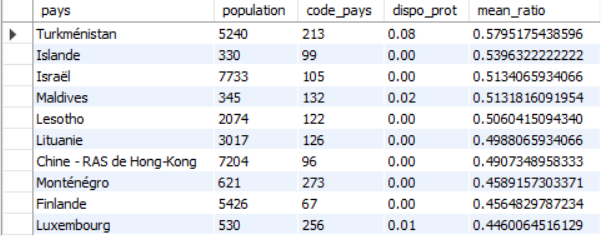

Les 10 pays ayant le plus haut ratio disponibilité alimentaire/habitant en termes de protéines (en kcal)

````
SELECT dispo_alim.pays,population.population,dispo_alim.code_pays,dispo_alim_kcal_p_j, AVG((dispo_alim_kcal_p_j*365)) as 'mean_ratio'
FROM dispo_alim
LEFT JOIN population ON dispo_alim.pays = population.pays
GROUP BY dispo_alim.pays
ORDER BY mean_ratio DESC
LIMIT 10;
````

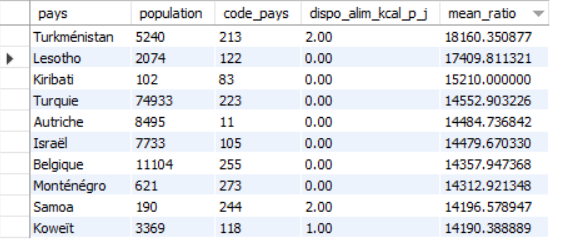

Pour l'année 2013, les 10 pays ayant le plus faible ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant.


````
SELECT dispo_alim.pays,population.population,dispo_alim.code_pays,dispo_prot, AVG((dispo_prot*0.001*population.population*1000*365)/(population.population*1000)) as 'mean_ratio'
FROM dispo_alim
LEFT JOIN population ON dispo_alim.pays = population.pays
GROUP BY dispo_alim.pays
ORDER BY mean_ratio ASC
LIMIT 10;

````

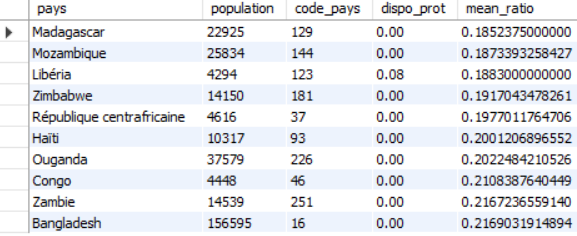

La quantité totale (en kg) de produits perdus par pays en 2013.

`````
SELECT SUM(pertes)
FROM equilibre_prod
`````

La quantité totale de produits perdus est environ : 454,5 Milliards de KG


Les 10 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte.


````
SELECT sous_nutrition.pays, nb_personnes, nb_personnes/(population.population*1000) as 'proportion'
FROM sous_nutrition
INNER JOIN  population ON population.pays = sous_nutrition.pays
ORDER BY proportion DESC
LIMIT 10;
````

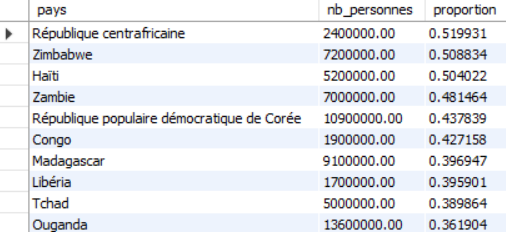

Les 10 produits pour lesquels le ratio Autres utilisations/Disponibilité intérieure est le plus élevé.


````
SELECT pays, produit, AVG(autres_utilisations/dispo_int) as 'rapport'
FROM equilibre_prod
GROUP BY produit
ORDER BY rapport DESC
LIMIT 10;


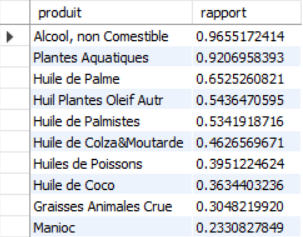

Question 20 : pour quelques-uns des produits identifiés dans cette dernière requête SQL, supposez quelles sont ces "autres utilisations" possibles (recherchez sur Internet !

* L'huile de palme est beaucoup utulisé dans l'agroalimmentaire, surtout dans la fabrication de biscuits, confiserie. Elle aussi utilisé dans la fabrication de certains produits hygiéniques, et de certains savons.

* L'huile de coco est utilisée comme matière première pour le biodiesel c'est à dire comme carburant pour moteur diesel. C'est aussi est un ingrédient de base important pour la fabrication du savon.

* les huiles de poisson sont utilisées comme émollients ou comme onguents généraux ainsi que dans l'art corporel, ou pour une prétendue isolation contre les températures froides.

* Dans de nombreux pays, des recherches importantes ont commencé à évaluer l'utilisation du manioc comme matière première de biocarburant à base d'éthanol.
